<a href="https://colab.research.google.com/github/elzains/Art-of-Cryptography-Using-Python/blob/main/Capstone_Project_Catalens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSRdcxSpBXkWmohwyidKrTVmCtkp_YYZjbuHe7WHqhyphenhyphensoGTFZrr7hli6o8ZmL6yZb3Q0a7Nt6Q6TcmzYpp44lKgWfBRTZV43BDB0jCcz79x63vSE81kBG_IInG9ukXz_6JcG9zmNjEXWdcPrMu8kokIhJs_sK_IYZamgve51HR4WQ8903ZuwyCaFdI-l4S/s1584/White%20Clean%20Minimalist%20Corporate%20Personal%20Profile%20LinkedIn%20Banner.png" width="100%">

---
# **⚡ Capstone Project Catalens 2024 ☕**
⏪ **Catalens is an Application for Detecting Cataracts in The Eye Using Machine Learning Technology** ⏩


---






### **0. Preparation**

In [135]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.15.0'

### **1. Mounting Datasets**

In [136]:
# Check Connection
from google.colab import drive
drive.mount('/content/drive/')

base_dir = '/content/drive/MyDrive/bigdata'
!ls '/content/drive/MyDrive/bigdata'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
test  train


### **2. Split Datasets Train and Test**

In [137]:
import os

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [138]:
train_cataract = os.path.join(train_dir, 'cataract')
train_normal = os.path.join(train_dir, 'normal')

test_cataract = os.path.join(test_dir, 'cataract')
test_normal = os.path.join(test_dir, 'normal')

print('Total Train Datasets')
print('Cataract =',len(os.listdir(train_cataract)))
print('Normal =',len(os.listdir(train_normal)))

print('\n\nTotal Test Datasets')
print('Cataract =',len(os.listdir(test_cataract)))
print('Normal =',len(os.listdir(test_normal)))

Total Train Datasets
Cataract = 4019
Normal = 1293


Total Test Datasets
Cataract = 333
Normal = 126


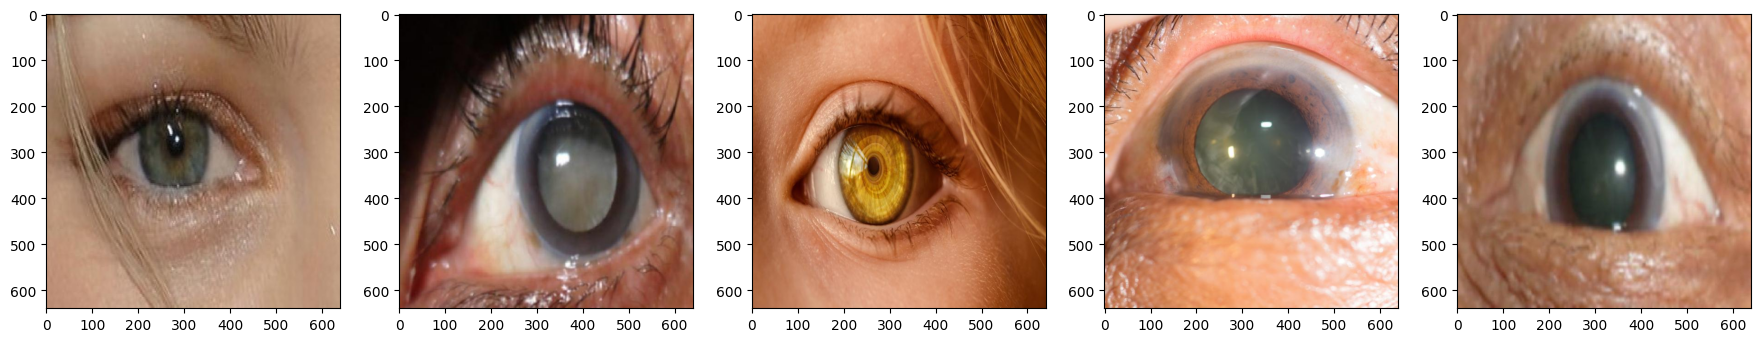

In [139]:
# Preview Cataract
os.chdir(train_cataract)
filenames = os.listdir()
images = []

for i in range(5):
  image = plt.imread(filenames[i])
  images.append(image)

plt.figure(figsize=(22, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i])
plt.show()

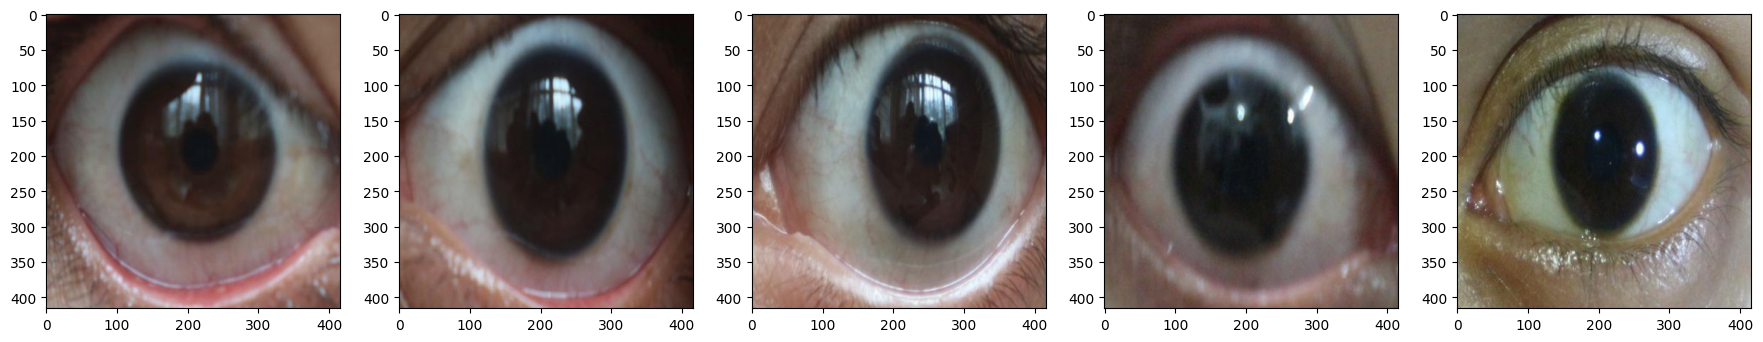

In [140]:
# Preview Normal
os.chdir(train_normal)
filenames = os.listdir()
images = []

for i in range(5):
  image = plt.imread(filenames[i])
  images.append(image)

plt.figure(figsize=(22, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i])
plt.show()

### **3. Pre~Processing With Image Augmentation**

In [141]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999
)

In [142]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
)

Found 5307 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


In [143]:
print('Class Train :', train_generator.class_indices)
print('Class Test :', test_generator.class_indices)

Class Train : {'cataract': 0, 'normal': 1}
Class Test : {'cataract': 0, 'normal': 1}


### **4. Model Convolutional Neural Network**